In [59]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib. pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Label true and fake users concat the dfs and use only valuable columns

In [60]:
def create_df():
    true = pd.read_csv("users.csv")
    fake = pd.read_csv("fusers.csv")
    true['user_status'] = 1
    fake['user_status'] = 0
    cols = ['statuses_count','followers_count','friends_count','favourites_count','listed_count','lang','user_status']
    df = pd.concat([true, fake])
    df = df[cols]
    print('True users in dataframe :', df['user_status'].value_counts()[1])
    print('Fake users in dataframe :', df['user_status'].value_counts()[0])
    print('Total users in the dataframe :', len(df))
    print('Using the following features:', cols)
    return df

## Various classifications metrics in a single dataframe 

In [61]:
def binary_classification_performance(y_test, y_pred, model):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall) 
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)
    model_name = model
    result = pd.DataFrame({
                         'Model' : [model_name],
                         'Precision' : [precision],
                         'Recall': [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]
                        })
    return result

## Plot the roc_auc curve 

In [62]:
def plot_roc_auc(y_test, y_pred):    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

## Crate the dataframe
## Use lable encoder on lang field to convert to numerical

In [82]:
df = create_df()
## use label encoder on lang column to change to numerical
le = preprocessing.LabelEncoder()
df.lang = le.fit_transform(df.lang)

True users in dataframe : 1481
Fake users in dataframe : 1337
Total users in the dataframe : 2818
Using the following features: ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'lang', 'user_status']


## XGBoost modelling pipeline
### 1.split the data into train and test
### 2.fit the model
### 3.use predict function
### 4.call the auc function to plot roc_auc curve
### 5.call the cm function to plot the confusion matrix

In [158]:
class XGboost:
    def _init_():
        pass
    
    def _model(self):
        self.model = xgb.XGBClassifier(random_state = 42)

    def _split_data(self, df):
        self.df = df
        self.x = df.drop(['user_status'], axis=1)
        self.y = df.user_status
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.30, random_state=42)
        
    def _fit_model(self):    
        self.model.fit(X_train, self.y_train)

    def _model_predict(self):
        self.y_pred = self.model.predict(self.X_test)
        
    def _get_metrics(self):
        return binary_classification_performance(self.y_test, self.y_pred, 'Test_metrics')
    
    def _get_auc(self):
        return plot_roc_auc(self.y_test, self.y_pred)
    
    def _get_cm(self):
        return sns.heatmap(confusion_matrix(self.y_test, self.y_pred), annot=True, fmt="d")

In [159]:
## initialize XGBoost model
model = XGboost()

In [160]:
model._model()

In [161]:
## split dataframe
model._split_data(df)

In [162]:
## fit the model
model._fit_model()

In [163]:
## call predict function
model._model_predict()

In [164]:
## get the classification metrics
model._get_metrics()

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,Test_metrics,0.99345,1.0,0.996714,1.0,455,388,3,0


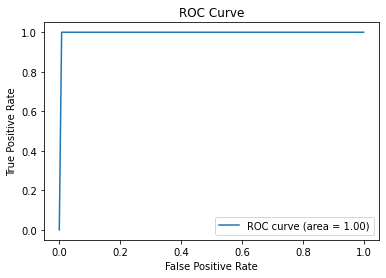

In [165]:
## get the roc_auc curve
model._get_auc()

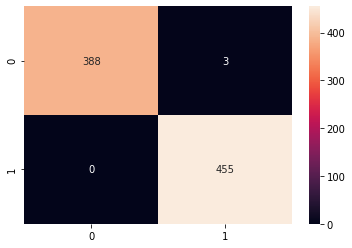

In [167]:
## get the confusion matrix
model._get_cm()
plt.show()